# Quick Transfer Learning with fastai

## Classify 12 kinds of nigiri sushi

In [1]:
from fastai import *
from fastai.vision import *

import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
from PIL import Image
%matplotlib inline

### Path to images

In [2]:
path = Path('/home/jupyter/myDir/fastai/sushi/') # contains 12 subdirectories for each considered kind of sushi

### Show some examples

In [3]:
def showExamples(ids):
    fig=plt.figure(figsize=(12, 12))
    for i,j in enumerate(ids):
        image = Image.open(pathToClass/(images[j]))
        fig.add_subplot(1,len(ids),i+1)
        plt.imshow(np.asarray(image))
        plt.axis("off")
    plt.show()

#### saba/mackerel

A total of 317 images with saba/mackerel sushi.


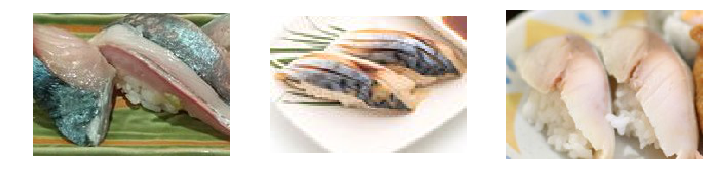

In [4]:
pathToClass = path/'saba_mackerel'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with saba/mackerel sushi.")
showExamples([10,20,30])

####  unagi/eel

A total of 323 images with unagi/eel sushi.


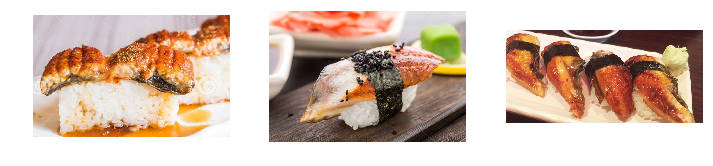

In [5]:
pathToClass = path/'unagi_eel'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with unagi/eel sushi.")
showExamples([10,20,30])

#### ebi/shrimp'

A total of 165 images with ebi/shrimp sushi.


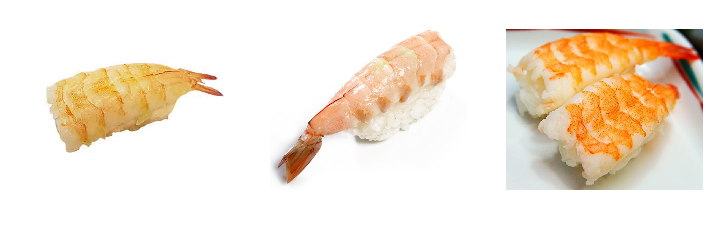

In [6]:
pathToClass = path/'ebi_shrimp'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with ebi/shrimp sushi.")
showExamples([10,20,40])

#### 'uni_seaurchin'

A total of 217 images with uni/seaurchin sushi.


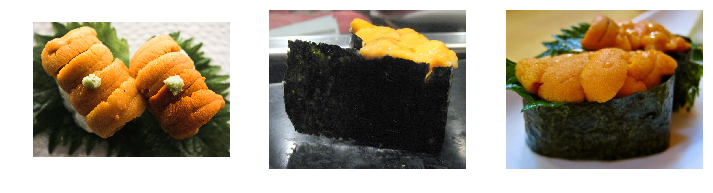

In [7]:
pathToClass = path/'uni_seaurchin'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with uni/seaurchin sushi.")
showExamples([10,20,30])

#### 'ikura_salmonroe'

A total of 193 images with ikura/salmonroe sushi.


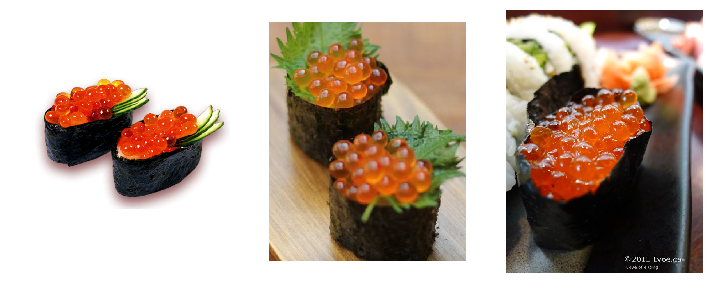

In [8]:
pathToClass = path/'ikura_salmonroe'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with ikura/salmonroe sushi.")
showExamples([10,20,30])

#### 'toro_tunafatty'

A total of 257 images with toro/tunafatty sushi.


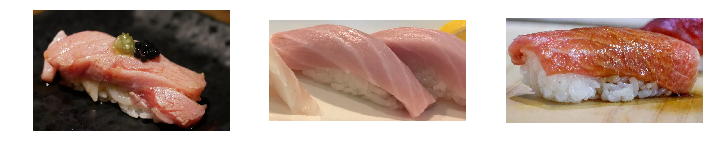

In [9]:
pathToClass = path/'toro_tunafatty'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with toro/tunafatty sushi.")
showExamples([10,20,30])

#### 'tako_octopus'

A total of 106 images with tako/octopus sushi.


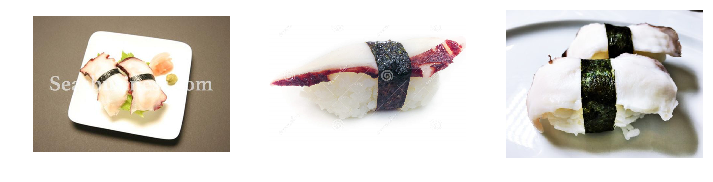

In [10]:
pathToClass = path/'tako_octopus'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with tako/octopus sushi.")
showExamples([10,25,30])

#### 'hamachi_yellowtail'

A total of 206 images with hamachi/yellowtail sushi.


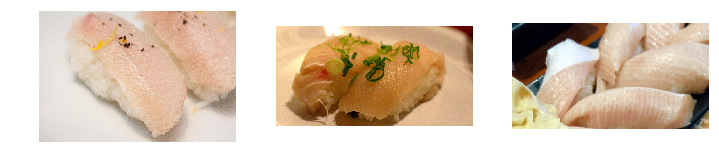

In [11]:
pathToClass = path/'hamachi_yellowtail'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with hamachi/yellowtail sushi.")
showExamples([10,20,30])

#### 'ika_squid'

A total of 295 images with ika/squid sushi.


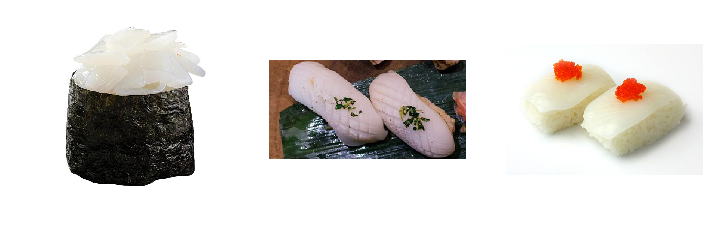

In [12]:
pathToClass = path/'ika_squid'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with ika/squid sushi.")
showExamples([10,20,30])

#### 'sake_salmon'

A total of 359 images with sake/salmon sushi.


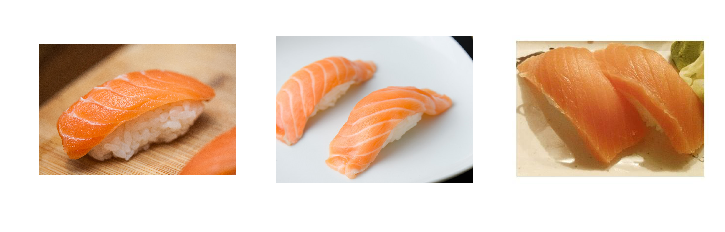

In [13]:
pathToClass = path/'sake_salmon'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with sake/salmon sushi.")
showExamples([10,20,30])

#### 'tamago_egg'

A total of 254 images with tamago/egg sushi.


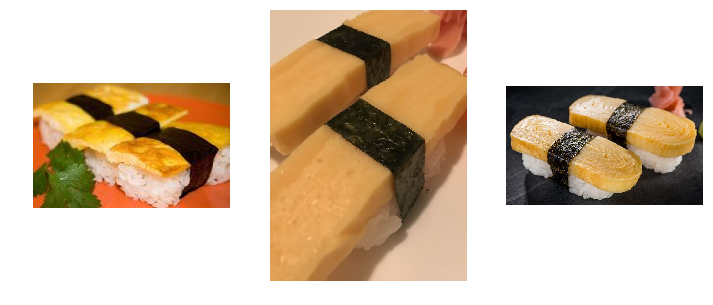

In [14]:
pathToClass = path/'tamago_egg'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with tamago/egg sushi.")
showExamples([10,20,30])

#### 'maguro_redtuna'

A total of 234 images with maguro/redtuna sushi.


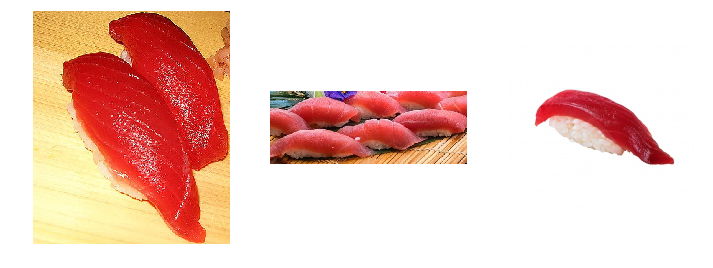

In [15]:
pathToClass = path/'maguro_redtuna'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with maguro/redtuna sushi.")
showExamples([10,20,30])

## Read data

- Leave 30% for validation.

- Apply default data augmentation transformations.

In [16]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.3,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [17]:
data.classes

['saba_mackerel',
 'unagi_eel',
 'ebi_shrimp',
 'uni_seaurchin',
 'ikura_salmonroe',
 'toro_tunafatty',
 'tako_octopus',
 'hamachi_yellowtail',
 'ika_squid',
 'sake_salmon',
 'tamago_egg',
 'maguro_redtuna']

#### Show some images used for training

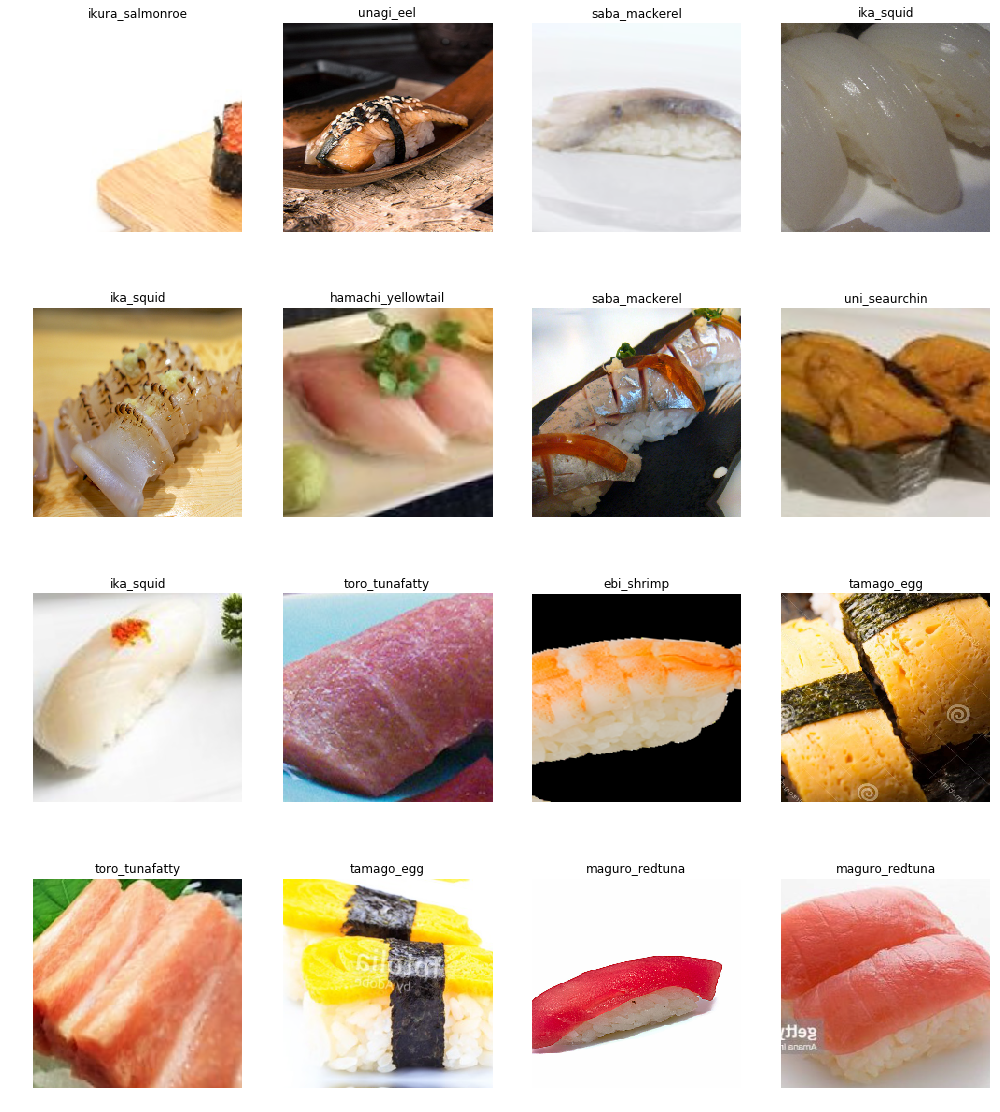

In [18]:
data.show_batch(rows=4, figsize=(14,16)) 

In [19]:
print("Number of examples in training:", len(data.train_ds))
print("Number of examples in validation:", len(data.valid_ds))

Number of examples in training: 2049
Number of examples in validation: 877


## Train model

#### Apply transfer learning using resnet34, tuning the parameters of the last layer.

In [20]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

#### Learn through 10 epochs; error rate is on validation set

In [21]:
learn.fit_one_cycle(10)

Total time: 03:50
epoch  train_loss  valid_loss  error_rate
1      2.130749    0.910807    0.240593    (00:25)
2      1.218789    0.404948    0.127708    (00:23)
3      0.761283    0.322355    0.107184    (00:22)
4      0.522821    0.280694    0.095781    (00:22)
5      0.383217    0.258707    0.091220    (00:21)
6      0.292796    0.249694    0.086659    (00:23)
7      0.239352    0.238310    0.080958    (00:22)
8      0.196476    0.223742    0.072976    (00:23)
9      0.158224    0.211780    0.072976    (00:23)
10     0.136314    0.214764    0.071836    (00:22)



### Error rate on validation: 7.2% (accuracy 92.8%) 

In [22]:
learn.save('sushi-1')

In [23]:
#learn.load('sushi-1')

## Confusion matrix on the validation set

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

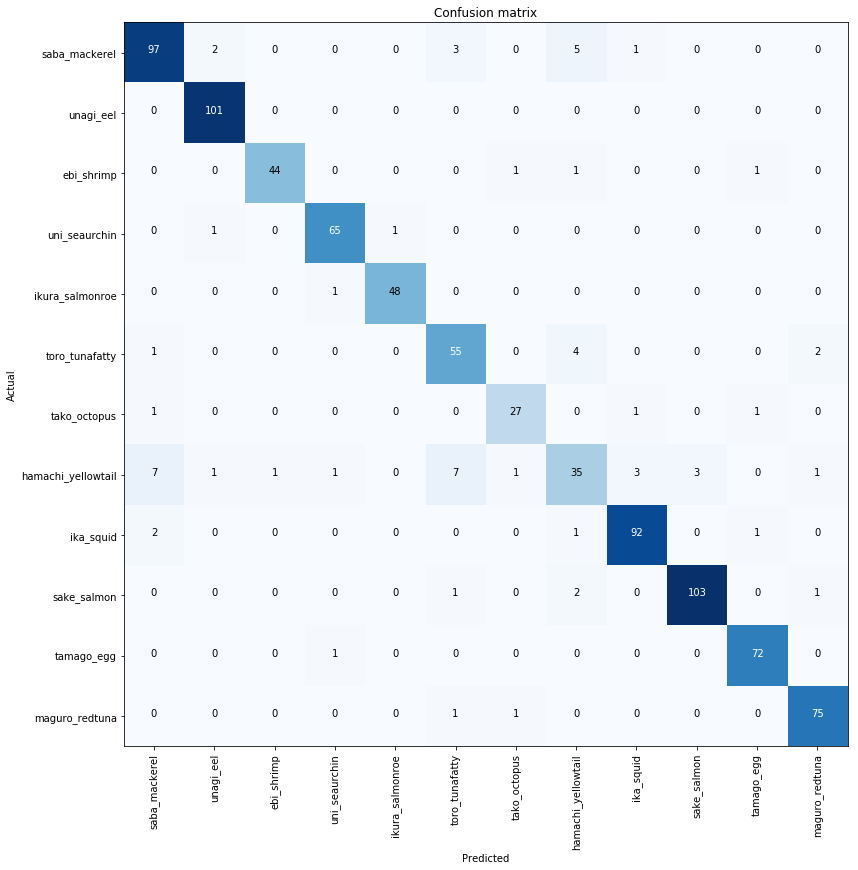

In [26]:
interp.plot_confusion_matrix(figsize=(12,12))

## Cases with highest loss

The 9 cases with highest loss (along with the prediction made, the actual class, the loss value, and the probability estimated for the correct class) are shown next. 

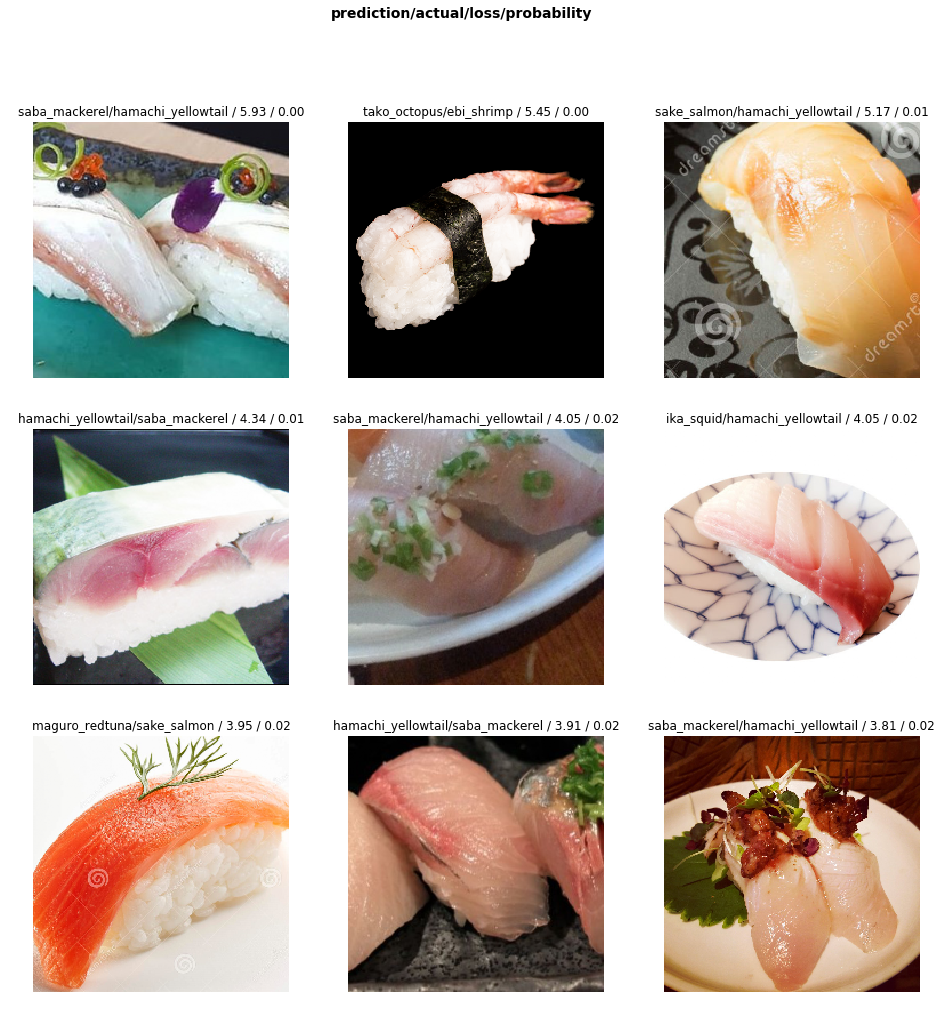

In [30]:
interp.plot_top_losses(16,figsize=(16,16))